In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn import datasets
%matplotlib inline
from sklearn import metrics

In [41]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
irisdata = pd.read_csv(url, names=colnames)

In [42]:
irisdata.head(10)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [43]:
X = irisdata.drop('Class', axis=1)
y = irisdata['Class']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# LINEAR KERNEL

In [46]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'linear', random_state = 80)
svcclassifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=80)

In [47]:
y_pred = svcclassifier.predict(X_test)
print(y_pred)

['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']


In [48]:
y_compare = np.vstack((y_test,y_pred)).T
y_compare[:10,:]

array([['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-versicolor', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica']], dtype=object)

In [49]:
# The Confusion Matrix
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
print(con_matrix)

[[ 8  0  0]
 [ 0  7  1]
 [ 0  0 14]]


In [50]:
#finding accuracy via the confusion matrix.
a = con_matrix.shape
corr_Pred = 0
false_Pred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corr_Pred +=con_matrix[row,c]
        else:
            false_Pred += con_matrix[row,c]
print('Correct predictions: ', corr_Pred)
print('False predictions', false_Pred)
kernelLinearAccuracy = corr_Pred/(con_matrix.sum())
print ('Accuracy of the SVC Clasification is: ', corr_Pred/(con_matrix.sum()))    

Correct predictions:  29
False predictions 1
Accuracy of the SVC Clasification is:  0.9666666666666667


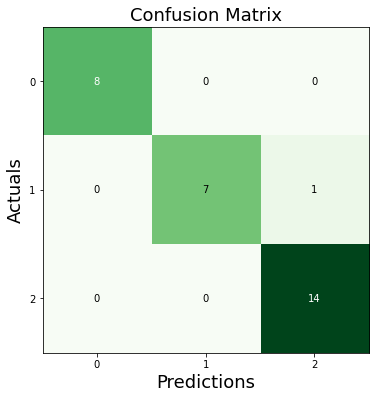

In [51]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=con_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



# POLYNOMIAL KERNEL

In [53]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'poly',degree=3 ,random_state = 80)
svcclassifier.fit(X_train, y_train)

SVC(kernel='poly', random_state=80)

In [54]:
y_pred = svcclassifier.predict(X_test)
print(y_pred)

['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']


In [55]:
y_compare = np.vstack((y_test,y_pred)).T
y_compare[:10,:]

array([['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica']], dtype=object)

In [56]:
# The Confusion Matrix
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
print(con_matrix)

[[ 8  0  0]
 [ 0  8  0]
 [ 0  2 12]]


In [57]:
#finding accuracy via the confusion matrix.
a = con_matrix.shape
corr_Pred = 0
false_Pred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corr_Pred +=con_matrix[row,c]
        else:
            false_Pred += con_matrix[row,c]
print('Correct predictions: ', corr_Pred)
print('False predictions', false_Pred)
kernelPolyAccuracy = corr_Pred/(con_matrix.sum())
print ('Accuracy of the SVC Clasification is: ', corr_Pred/(con_matrix.sum()))    

Correct predictions:  28
False predictions 2
Accuracy of the SVC Clasification is:  0.9333333333333333


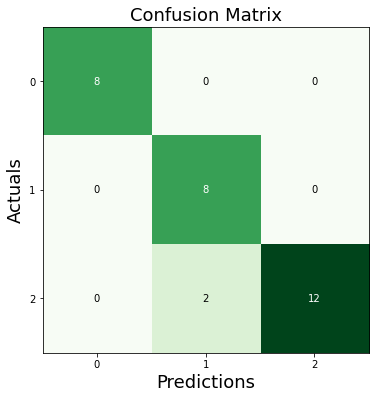

In [58]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=con_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.80      1.00      0.89         8
 Iris-virginica       1.00      0.86      0.92        14

       accuracy                           0.93        30
      macro avg       0.93      0.95      0.94        30
   weighted avg       0.95      0.93      0.93        30



# RBF KERNEL

In [60]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'rbf',gamma = 0.5, random_state = 80)
svcclassifier.fit(X_train, y_train)

SVC(gamma=0.5, random_state=80)

In [61]:
y_pred = svcclassifier.predict(X_test)
print(y_pred)

['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']


In [62]:
y_compare = np.vstack((y_test,y_pred)).T
y_compare[:10,:]

array([['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-versicolor', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica']], dtype=object)

In [63]:
# The Confusion Matrix
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
print(con_matrix)

[[ 8  0  0]
 [ 0  7  1]
 [ 0  0 14]]


In [64]:
#finding accuracy via the confusion matrix.
a = con_matrix.shape
corr_Pred = 0
false_Pred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corr_Pred +=con_matrix[row,c]
        else:
            false_Pred += con_matrix[row,c]
print('Correct predictions: ', corr_Pred)
print('False predictions', false_Pred)
kernelRbfAccuracy = corr_Pred/(con_matrix.sum())
print ('Accuracy of the SVC Clasification is: ', corr_Pred/(con_matrix.sum()))    

Correct predictions:  29
False predictions 1
Accuracy of the SVC Clasification is:  0.9666666666666667


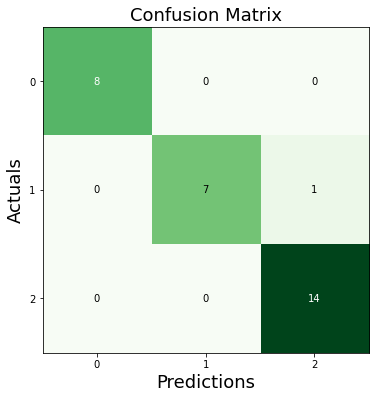

In [65]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=con_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



# SIGMOID KERNEL

In [67]:
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'sigmoid', random_state = 80)
svcclassifier.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=80)

In [68]:
y_pred = svcclassifier.predict(X_test)
print(y_pred)

['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']


In [69]:
y_compare = np.vstack((y_test,y_pred)).T
y_compare[:10,:]

array([['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-versicolor', 'Iris-versicolor'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-versicolor', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-versicolor']], dtype=object)

In [70]:
# The Confusion Matrix
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
print(con_matrix)

[[ 8  0  0]
 [ 0  7  1]
 [ 0  2 12]]


In [71]:
#finding accuracy via the confusion matrix.
a = con_matrix.shape
corr_Pred = 0
false_Pred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corr_Pred +=con_matrix[row,c]
        else:
            false_Pred += con_matrix[row,c]
print('Correct predictions: ', corr_Pred)
print('False predictions', false_Pred)
kernelSigmoidAccuracy = corr_Pred/(con_matrix.sum())   
print ('Accuracy of the SVC Clasification is: ', corr_Pred/(con_matrix.sum()))    

Correct predictions:  27
False predictions 3
Accuracy of the SVC Clasification is:  0.9


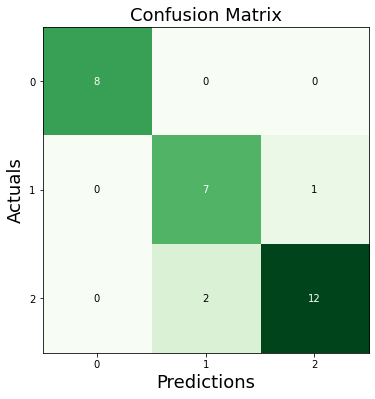

In [72]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=con_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.78      0.88      0.82         8
 Iris-virginica       0.92      0.86      0.89        14

       accuracy                           0.90        30
      macro avg       0.90      0.91      0.90        30
   weighted avg       0.90      0.90      0.90        30



In [74]:
print('\nAccuracy of SVC classfication with different kernels are :\n\n')
print ('Accuracy of the SVC Clasification with Linear kernel and no other adjust is: ', kernelLinearAccuracy)
print ('Accuracy of the SVC Clasification with Polynomial kernel and no other adjust is: ', kernelPolyAccuracy)
print ('Accuracy of the SVC Clasification with Radial Basis Function kernel and no other adjust is: ', kernelRbfAccuracy)
print ('Accuracy of the SVC Clasification with Sigmoid kernel and no other adjust is: ', kernelSigmoidAccuracy)


Accuracy of SVC classfication with different kernels are :


Accuracy of the SVC Clasification with Linear kernel and no other adjust is:  0.9666666666666667
Accuracy of the SVC Clasification with Polynomial kernel and no other adjust is:  0.9333333333333333
Accuracy of the SVC Clasification with Radial Basis Function kernel and no other adjust is:  0.9666666666666667
Accuracy of the SVC Clasification with Sigmoid kernel and no other adjust is:  0.9


In [75]:
kernel = pd.Series(['Linear kernel', 'Polynomial kernel', 'RBF kernel', 'Sigmoid kernel'])
acc= pd.Series([kernelLinearAccuracy, kernelPolyAccuracy, kernelRbfAccuracy, kernelSigmoidAccuracy])
df_kernel = kernel.to_frame(name = "Kernel")
df_acc = acc.to_frame(name = "accuracy")

In [76]:
df = pd.concat([df_kernel, df_acc], axis=1)
print(df)

              Kernel  accuracy
0      Linear kernel  0.966667
1  Polynomial kernel  0.933333
2         RBF kernel  0.966667
3     Sigmoid kernel  0.900000


<AxesSubplot:>

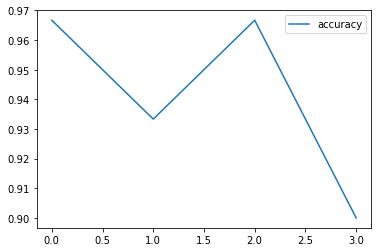

In [77]:
df.plot.line()

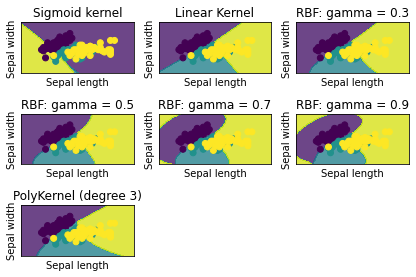

In [83]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
h = 0.05
C = 1.0
lin_svc = svm.SVC(kernel='linear', C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
rbf_svc1 = svm.SVC(kernel='rbf', gamma=0.3, C=C).fit(X, y)
rbf_svc2 = svm.SVC(kernel='rbf', gamma=0.5, C=C).fit(X, y)
rbf_svc3 = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
rbf_svc4 = svm.SVC(kernel='rbf', gamma=0.9, C=C).fit(X, y)
svc = svm.SVC(kernel='sigmoid', C=C).fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
titles = ['Sigmoid kernel', 'Linear Kernel','RBF: gamma = 0.3','RBF: gamma = 0.5','RBF: gamma = 0.7','RBF: gamma = 0.9','PolyKernel (degree 3)']
for i, clf in enumerate((svc , lin_svc , rbf_svc1 , rbf_svc2 , rbf_svc3 , rbf_svc4 , poly_svc )):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.tight_layout()
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()
